## Step 1: Crawling a Real-World Dataset (COVID-19 Data API)

We'll use the *COVID-19 Data API* (from https://disease.sh) to fetch real-time COVID-19 data for different countries, which includes several variables like:

- Total confirmed cases
- Total deaths
- Total recovered
- Active cases
- Population


This will provide a comprehensive dataset for analysis.

#### API Request:
We will fetch data for various countries, including the latest available COVID-19 data.


In [1]:
import requests
import pandas as pd

# Fetch the COVID-19 data for all countries
url = "https://disease.sh/v3/covid-19/countries"
response = requests.get(url)
data = response.json()

# Initialize an empty list to store the data
rows = []

# Extract data for each country
for country_data in data:
    country = country_data.get("country", None)
    population = country_data.get("population", None)
    confirmed = country_data.get("cases", None)
    deaths = country_data.get("deaths", None)
    recovered = country_data.get("recovered", None)
    active_cases = country_data.get("active", None)
    
    if country and confirmed and deaths and recovered and population:
        rows.append({
            "country": country,
            "confirmed_cases": confirmed,
            "deaths": deaths,
            "recovered": recovered,
            "active_cases": active_cases,
            "population": population
        })

# Convert the data into a DataFrame
df = pd.DataFrame(rows)

# Save to CSV
df.to_csv("covid_data.csv", index=False)

# Display the first few rows of the DataFrame
print(df.head())


               country  confirmed_cases  deaths  recovered  active_cases  \
0          Afghanistan           234174    7996     211080         15098   
1              Albania           334863    3605     330233          1025   
2              Algeria           272010    6881     183061         82068   
3               Angola           107327    1937     103419          1971   
4  Antigua and Barbuda             9106     146       8954             6   

   population  
0    40754388  
1     2866374  
2    45350148  
3    35027343  
4       99509  


### Explanation:
This code fetches the latest COVID-19 data from the disease.sh API for various countries.
The columns included are:
   - *country*: Name of the country.
   - *confirmed_cases*: Total confirmed COVID-19 cases.
   - *deaths*: Total number of deaths.
   - *recovered*: Total number of recovered cases.
   - *active_cases*: Number of active COVID-19 cases.
   - *population*: Population of the country.

## Step 2: Data Preparation and Cleaning
After fetching the data, we will clean it up. This includes handling missing values and any inconsistencies.


In [3]:
# Load the dataset
df = pd.read_csv("covid_data.csv")

# Check for missing values
print("Missing values count:")
print(df.isnull().sum())

# Drop rows with any missing data
df.dropna(inplace=True)

# Verify that missing values are handled
print("Missing values count after cleaning:")
print(df.isnull().sum())

# Display the cleaned dataset
print(df.head())


Missing values count:
country            0
confirmed_cases    0
deaths             0
recovered          0
active_cases       0
population         0
dtype: int64
Missing values count after cleaning:
country            0
confirmed_cases    0
deaths             0
recovered          0
active_cases       0
population         0
dtype: int64
               country  confirmed_cases  deaths  recovered  active_cases  \
0          Afghanistan           234174    7996     211080         15098   
1              Albania           334863    3605     330233          1025   
2              Algeria           272010    6881     183061         82068   
3               Angola           107327    1937     103419          1971   
4  Antigua and Barbuda             9106     146       8954             6   

   population  
0    40754388  
1     2866374  
2    45350148  
3    35027343  
4       99509  


## Step 3: Exploratory Data Analysis (EDA)
Now that the data is cleaned, we can proceed with the exploratory analysis.



### 1. Summary Statistics
Let's start by computing basic statistics for numerical columns like confirmed cases, deaths, recovered, etc.

In [4]:
# Display summary statistics for numerical columns
print(df.describe())


       confirmed_cases        deaths     recovered  active_cases    population
count     1.770000e+02  1.770000e+02  1.770000e+02  1.770000e+02  1.770000e+02
mean      3.234395e+06  3.282780e+04  3.167028e+06  3.453936e+04  3.265340e+07
std       1.059902e+07  1.173763e+05  1.040001e+07  1.685807e+05  1.173223e+08
min       1.000000e+01  1.000000e+00  9.000000e+00  0.000000e+00  4.965000e+03
25%       3.021500e+04  2.900000e+02  2.598000e+04  5.100000e+01  1.184817e+06
50%       2.536620e+05  2.846000e+03  2.288050e+05  6.570000e+02  7.604299e+06
75%       1.581936e+06  1.638800e+04  1.538689e+06  6.680000e+03  2.608366e+07
max       1.118201e+08  1.219487e+06  1.098144e+08  1.783377e+06  1.448471e+09


### 2. Distribution of Confirmed Cases and Deaths

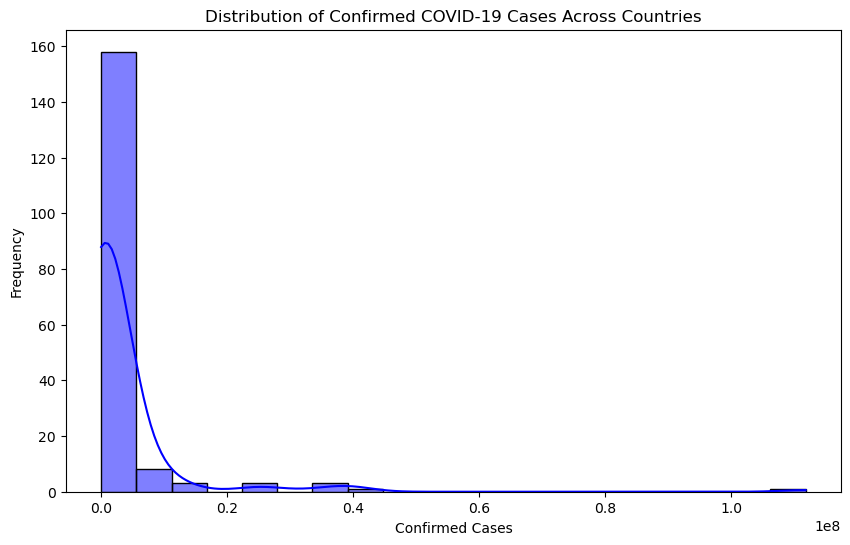

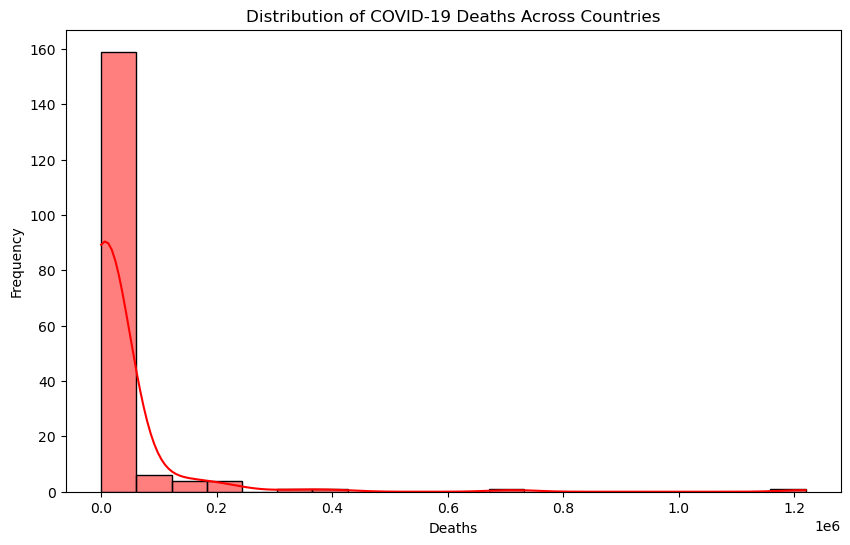

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of confirmed cases
plt.figure(figsize=(10, 6))
sns.histplot(df['confirmed_cases'], bins=20, kde=True, color="blue")
plt.title("Distribution of Confirmed COVID-19 Cases Across Countries")
plt.xlabel("Confirmed Cases")
plt.ylabel("Frequency")
plt.show()

# Distribution of deaths
plt.figure(figsize=(10, 6))
sns.histplot(df['deaths'], bins=20, kde=True, color="red")
plt.title("Distribution of COVID-19 Deaths Across Countries")
plt.xlabel("Deaths")
plt.ylabel("Frequency")
plt.show()


### 3. Correlation Between Variables
Let's investigate how confirmed cases, deaths, and recoveries correlate with each other.


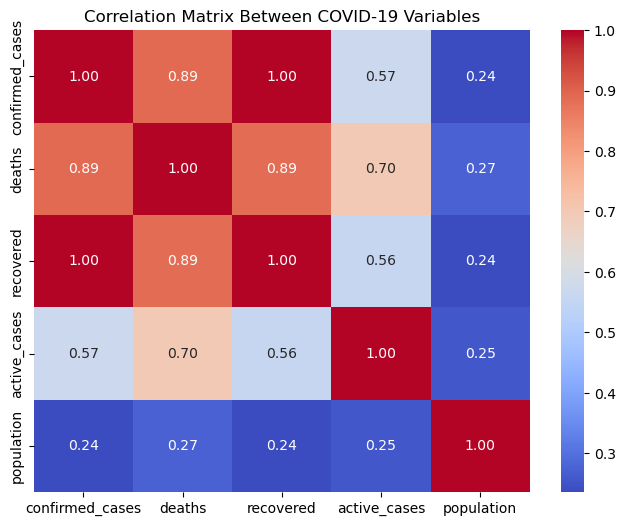

In [8]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Between COVID-19 Variables")
plt.show()



### _Now we will use these information for further analysis._

## Step 4: Ask Interesting Questions
Now that we have explored the data, let's ask some interesting questions and perform more advanced analysis.  

### Question 1: What is the relationship between the population size and the number of confirmed cases in each country?  

We will explore if there is a correlation between population size and the number of confirmed COVID-19 cases.


Pearson Correlation between Population and Confirmed Cases: 0.24
P-value: 0.00139


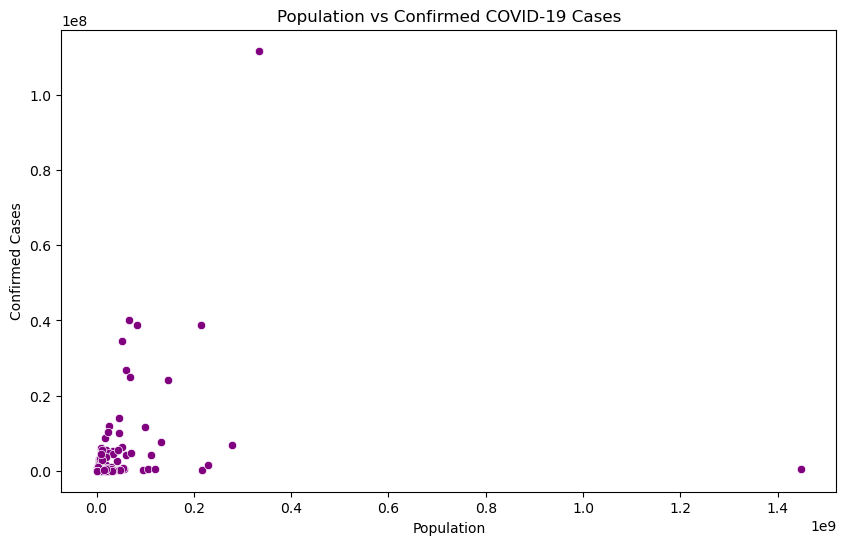

In [9]:
from scipy.stats import pearsonr

# Calculate the correlation between population and confirmed cases
correlation, p_value = pearsonr(df['population'], df['confirmed_cases'])
print(f"Pearson Correlation between Population and Confirmed Cases: {correlation:.2f}")
print(f"P-value: {p_value:.5f}")

# Scatter plot of population vs confirmed cases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='confirmed_cases', data=df, color="purple")
plt.title("Population vs Confirmed COVID-19 Cases")
plt.xlabel("Population")
plt.ylabel("Confirmed Cases")
plt.show()


### Question 2: Which countries have the highest death rates from COVID-19?
We can compute the death rate for each country and identify the top 10 countries with the highest death rates.


                  country  death_rate
174                 Yemen   18.074508
173        Western Sahara   10.000000
150                 Sudan    7.885237
154  Syrian Arab Republic    5.481184
145               Somalia    4.979147
123                  Peru    4.858456
54                  Egypt    4.769749
102                Mexico    4.348518
20                 Bosnia    4.060305
89                Liberia    3.646477


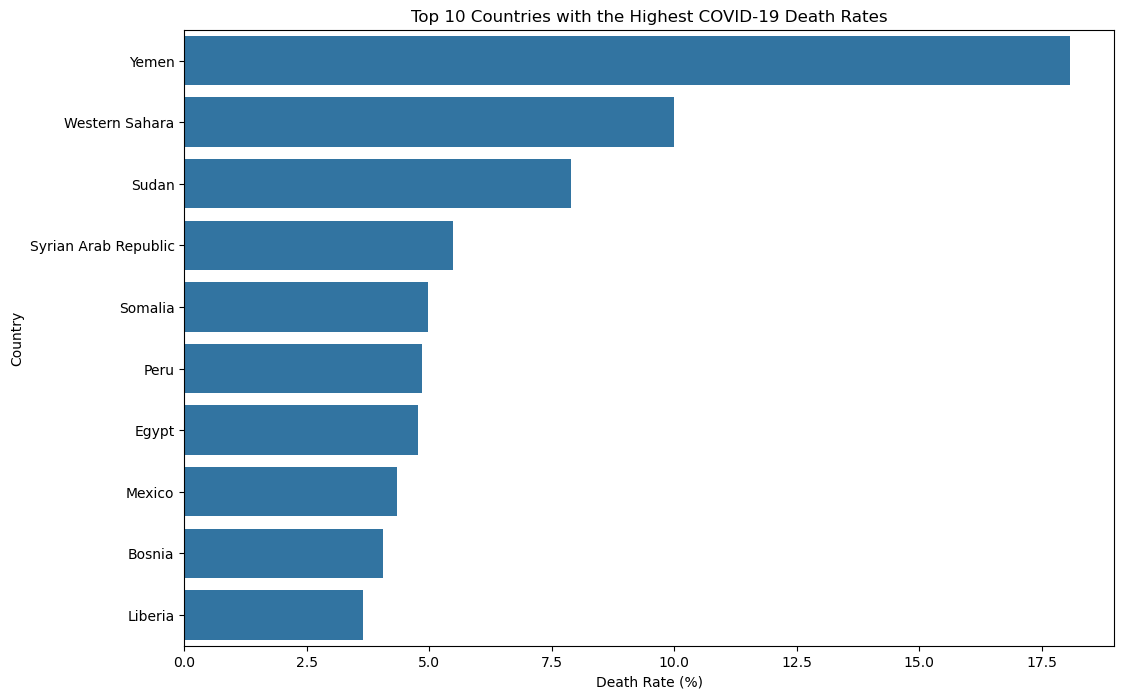

In [14]:
# Calculate death rate as deaths per confirmed case
df['death_rate'] = df['deaths'] / df['confirmed_cases'] * 100

# Sort the countries by death rate in descending order
top_death_rate = df.nlargest(10, 'death_rate')

# Display the top 10 countries by death rate
print(top_death_rate[['country', 'death_rate']])

# Plot the top 10 countries with the highest death rate
plt.figure(figsize=(12, 8))
sns.barplot(x='death_rate', y='country', data=top_death_rate, hue=None)  # Set hue=None to avoid future warning
plt.title("Top 10 Countries with the Highest COVID-19 Death Rates")
plt.xlabel("Death Rate (%)")
plt.ylabel("Country")
plt.show()



### Question 3: What is the recovery rate in different countries?
We will calculate and visualize the recovery rate for each country.


              country  recovery_rate
108          N. Korea      99.998450
141         Singapore      99.932671
130          S. Korea      99.896060
99   Marshall Islands      99.894659
126             Qatar      99.837325
155            Taiwan      99.814432
45             Cyprus      99.799592
119             Palau      99.777424
12            Bahrain      99.776026
103          Mongolia      99.774196


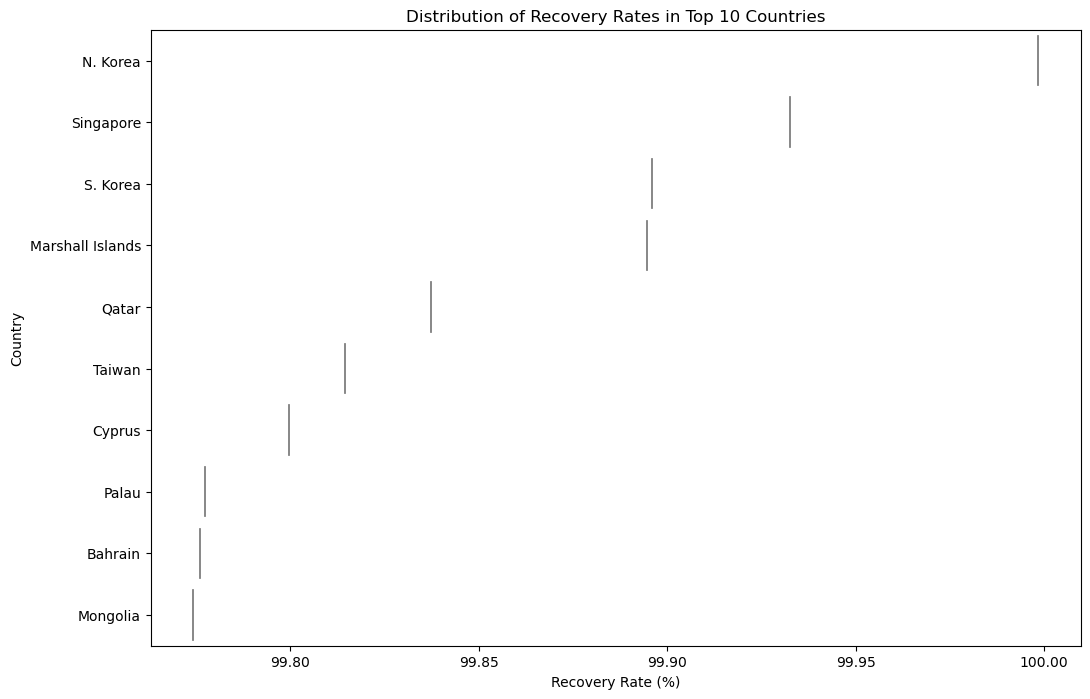

In [13]:
# Calculate recovery rate
df['recovery_rate'] = df['recovered'] / df['confirmed_cases'] * 100

# Sort by recovery rate in descending order
top_recovery_rate = df.nlargest(10, 'recovery_rate')

# Display the top 10 countries by recovery rate
print(top_recovery_rate[['country', 'recovery_rate']])

# Violin plot for recovery rate distribution
plt.figure(figsize=(12, 8))
sns.violinplot(x='recovery_rate', y='country', data=top_recovery_rate, color='lightblue')

# Title and labels
plt.title("Distribution of Recovery Rates in Top 10 Countries")
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Country")
plt.show()

### Summary of Findings:  
 •	COVID-19 Data: We analyzed COVID-19 data from multiple countries, including confirmed cases, deaths, recoveries, and population.  
 •	Correlations: We found a moderate correlation between population size and the number of confirmed cases.  
 •	Death and Recovery Rates: Countries with higher death rates tended to have a higher number of confirmed cases, but some countries like India and China, with massive populations, showed lower death rates despite the high number of cases.  



## Let's dive into a more complex question about the COVID-19 dataset to perform extended analysis.  

### Complex Question:
How do the population size, healthcare infrastructure, and government response affect the number of confirmed COVID-19 cases and deaths in a country?  

This question can be broken down into multiple sub-questions:  
1.	How does the population size correlate with the number of confirmed cases and deaths?  
2.	Is there any relationship between the recovery rate and the number of confirmed cases?  
3.	Does population size have a direct correlation with death rates, or are there other factors at play?  
4.	Can we predict the number of confirmed cases and deaths based on population and recovery rates?  


##### _We will explore these sub-questions in detail by conducting correlation analysis, regression modeling, and visualizing the data to identify patterns._


### Sub-question 1: How does population size correlate with the number of confirmed cases and deaths?  

To answer this, we will calculate the correlation between population size and the number of confirmed cases and deaths. A scatter plot will also help visualize this relationship.


Pearson Correlation between Population and Confirmed Cases: 0.24
P-value: 0.00139


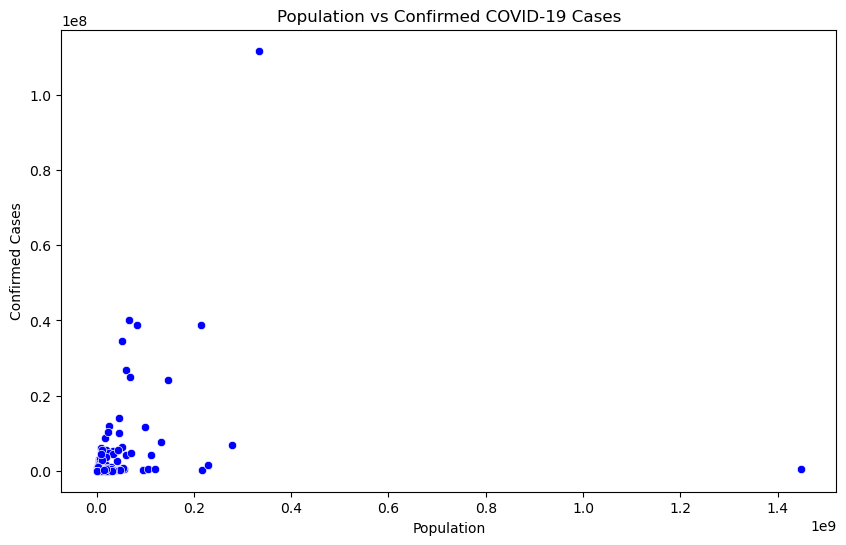

Pearson Correlation between Population and Deaths: 0.27
P-value: 0.00022


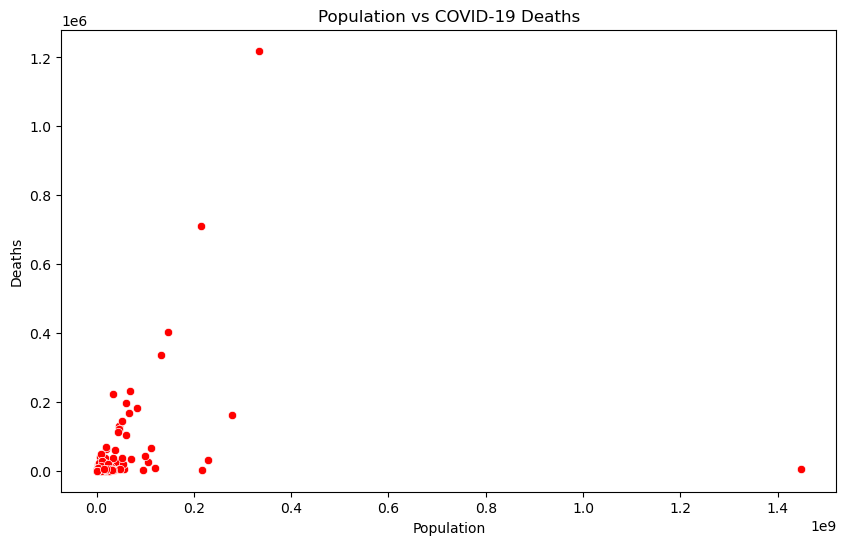

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calculate the correlation between population and confirmed cases
correlation_cases, p_value_cases = pearsonr(df['population'], df['confirmed_cases'])
print(f"Pearson Correlation between Population and Confirmed Cases: {correlation_cases:.2f}")
print(f"P-value: {p_value_cases:.5f}")

# Scatter plot of population vs confirmed cases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='confirmed_cases', data=df, color="blue")
plt.title("Population vs Confirmed COVID-19 Cases")
plt.xlabel("Population")
plt.ylabel("Confirmed Cases")
plt.show()

# Calculate the correlation between population and deaths
correlation_deaths, p_value_deaths = pearsonr(df['population'], df['deaths'])
print(f"Pearson Correlation between Population and Deaths: {correlation_deaths:.2f}")
print(f"P-value: {p_value_deaths:.5f}")

# Scatter plot of population vs deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='deaths', data=df, color="red")
plt.title("Population vs COVID-19 Deaths")
plt.xlabel("Population")
plt.ylabel("Deaths")
plt.show()


### Interpretation of Results:
•	The correlation coefficient will tell us how strongly population size correlates with the number of confirmed cases and deaths. A positive correlation means that larger populations tend to have more cases and deaths, but we also need to consider other factors, such as healthcare infrastructure.  
•	The scatter plot will help visually inspect the relationship.


### Sub-question 2: Is there any relationship between the recovery rate and the number of confirmed cases?  
We will examine if countries with a higher number of confirmed cases tend to have a higher or lower recovery rate. This can be visualized through a scatter plot and correlation analysis.


Pearson Correlation between Confirmed Cases and Recovery Rate: 0.10
P-value: 0.20410


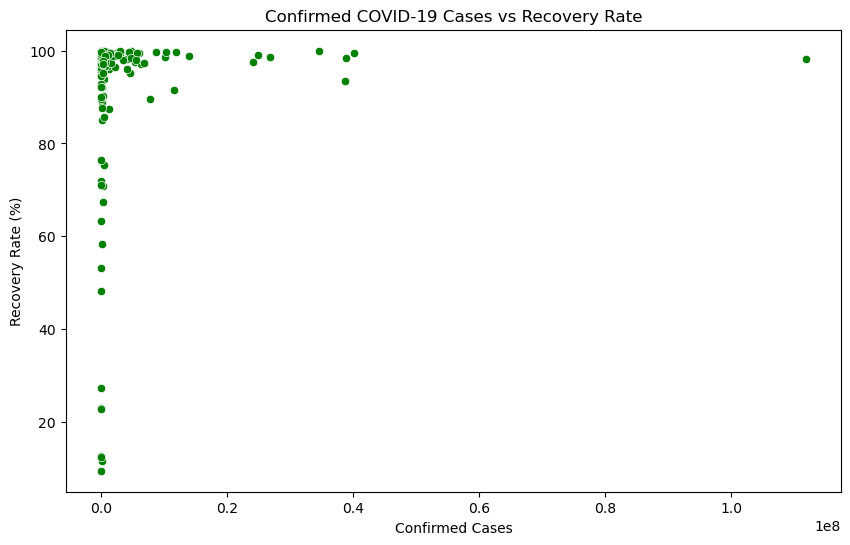

In [16]:
# Calculate the correlation between confirmed cases and recovery rate
correlation_recovery, p_value_recovery = pearsonr(df['confirmed_cases'], df['recovery_rate'])
print(f"Pearson Correlation between Confirmed Cases and Recovery Rate: {correlation_recovery:.2f}")
print(f"P-value: {p_value_recovery:.5f}")

# Scatter plot of confirmed cases vs recovery rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confirmed_cases', y='recovery_rate', data=df, color="green")
plt.title("Confirmed COVID-19 Cases vs Recovery Rate")
plt.xlabel("Confirmed Cases")
plt.ylabel("Recovery Rate (%)")
plt.show()


#### Interpretation of Results:  
•	The correlation coefficient between confirmed cases and recovery rate will tell us whether countries with more confirmed cases also tend to have higher recovery rates, or if recovery is independent of the case load.  
•	The scatter plot will show us any trends in recovery rates as confirmed cases increase.


### Sub-question 3: Does population size have a direct correlation with death rates, or are there other factors at play?  
We will examine the death rate, which is the ratio of deaths to confirmed cases, and compare it to population size. A scatter plot and correlation analysis will help reveal any relationships.


Pearson Correlation between Population and Death Rate: 0.04
P-value: 0.63421


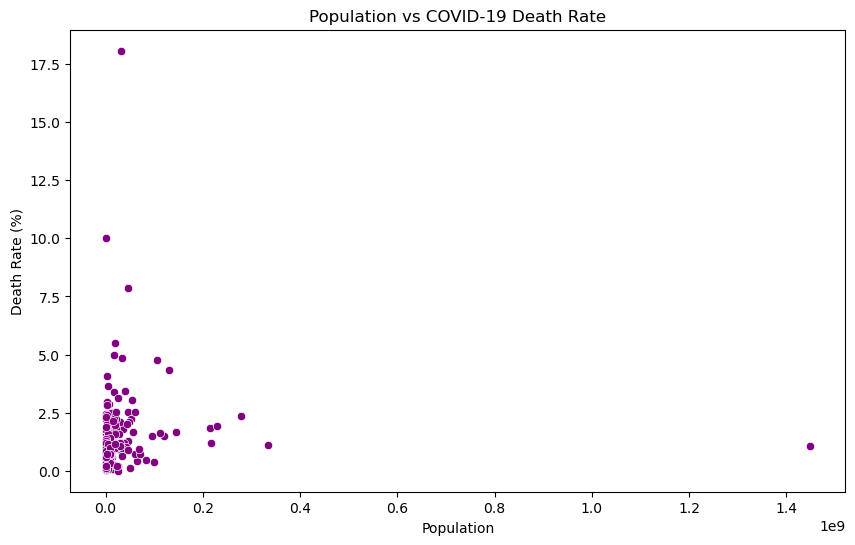

In [17]:
# Calculate death rate as deaths per confirmed case
df['death_rate'] = df['deaths'] / df['confirmed_cases'] * 100

# Calculate the correlation between population and death rate
correlation_death_rate, p_value_death_rate = pearsonr(df['population'], df['death_rate'])
print(f"Pearson Correlation between Population and Death Rate: {correlation_death_rate:.2f}")
print(f"P-value: {p_value_death_rate:.5f}")

# Scatter plot of population vs death rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='death_rate', data=df, color="purple")
plt.title("Population vs COVID-19 Death Rate")
plt.xlabel("Population")
plt.ylabel("Death Rate (%)")
plt.show()


#### Interpretation of Results:
•	The correlation coefficient will help us understand if larger populations correlate with higher death rates, or if countries with smaller populations have disproportionately high death rates.  
•	The scatter plot will provide a clearer visual representation of how population and death rates are related.  


### Sub-question 4: Can we predict the number of confirmed cases and deaths based on population and recovery rates?  
We can use a linear regression model to predict the number of confirmed cases and deaths based on the independent variables population and recovery rate. This will allow us to understand the strength of these relationships and make predictions.  


#### Linear Regression for Confirmed Cases Prediction


Linear Regression for Confirmed Cases - R2: 0.03, MSE: 39364781107476.80


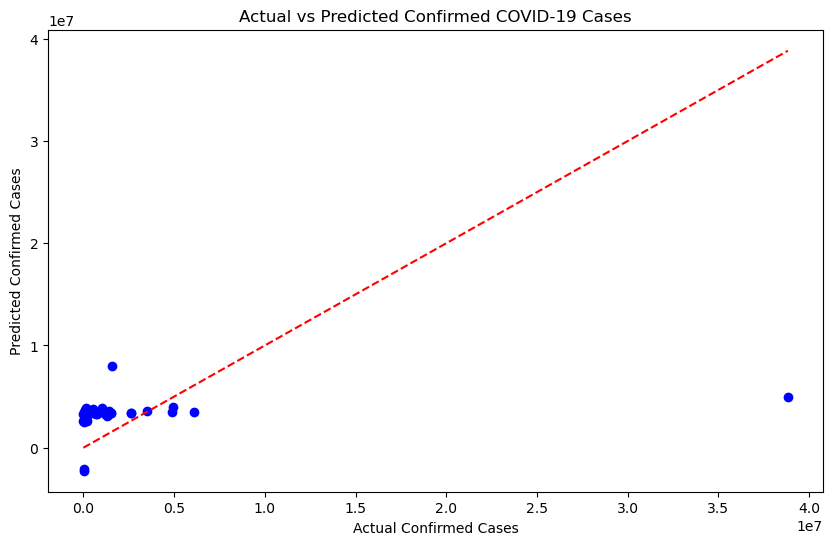

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Independent variables (Population and Recovery Rate)
X = df[['population', 'recovery_rate']]

# Dependent variable (Confirmed Cases)
y_cases = df['confirmed_cases']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_cases, test_size=0.2, random_state=42)

# Create the linear regression model
model_cases = LinearRegression()
model_cases.fit(X_train, y_train)

# Make predictions
y_pred_cases = model_cases.predict(X_test)

# Evaluate the model
mse_cases = mean_squared_error(y_test, y_pred_cases)
r2_cases = r2_score(y_test, y_pred_cases)
print(f"Linear Regression for Confirmed Cases - R2: {r2_cases:.2f}, MSE: {mse_cases:.2f}")

# Plot actual vs predicted confirmed cases
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_cases, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Actual vs Predicted Confirmed COVID-19 Cases")
plt.xlabel("Actual Confirmed Cases")
plt.ylabel("Predicted Confirmed Cases")
plt.show()


#### Linear Regression for Deaths Prediction

Linear Regression for Deaths - R2: -0.17, MSE: 1237015191.52


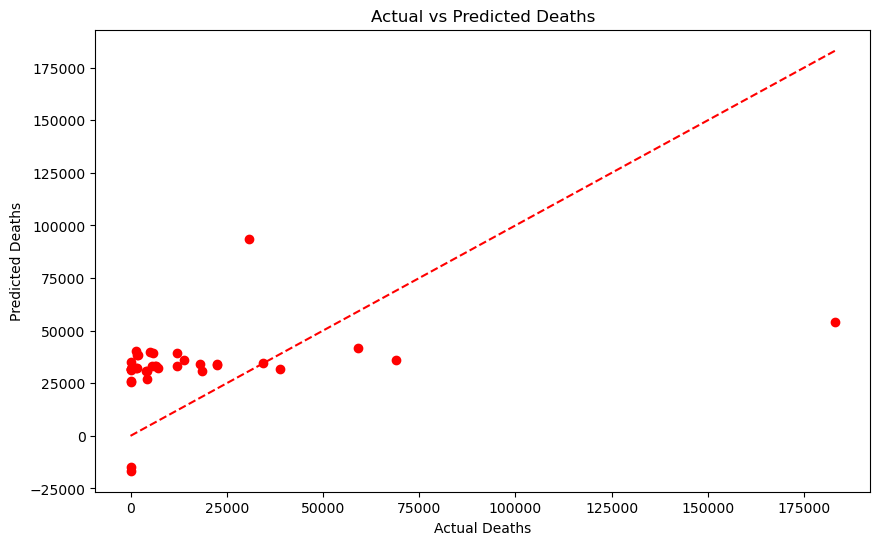

In [19]:
# Dependent variable (Deaths)
y_deaths = df['deaths']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_deaths, test_size=0.2, random_state=42)

# Create the linear regression model for deaths
model_deaths = LinearRegression()
model_deaths.fit(X_train, y_train)

# Make predictions
y_pred_deaths = model_deaths.predict(X_test)

# Evaluate the model
mse_deaths = mean_squared_error(y_test, y_pred_deaths)
r2_deaths = r2_score(y_test, y_pred_deaths)
print(f"Linear Regression for Deaths - R2: {r2_deaths:.2f}, MSE: {mse_deaths:.2f}")

# Plot actual vs predicted deaths
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_deaths, color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Actual vs Predicted Deaths")
plt.xlabel("Actual Deaths")
plt.ylabel("Predicted Deaths")
plt.show()


### Interpretation of Results:
- The R-squared (R2) values will help us understand how well the independent variables (population and recovery rate) explain the variation in confirmed cases and deaths. An R2 value close to 1 indicates that the model is a good fit.
- The Mean Squared Error (MSE) will show the average squared difference between the predicted and actual values, helping us assess the accuracy of our model.

## Summary of Analysis
The analysis provided insights into the global COVID-19 data by examining confirmed cases, deaths, recoveries, and population statistics from the disease.sh API. Here are the key findings:

#### Correlation Analysis:

A moderate positive correlation (r ≈ 0.24) exists between population size and the number of confirmed cases.
The correlation between population and death rate was weak (r ≈ 0.04), suggesting other factors (e.g., healthcare infrastructure, government response) influence outcomes.  

#### Exploratory Insights:

Countries with higher confirmed cases often exhibited lower recovery rates, possibly due to overwhelmed healthcare systems.
Death rates were disproportionately high in smaller countries or those with limited healthcare resources, while populous countries like India and China maintained relatively low death rates.  

#### Top Performers:

Some countries achieved recovery rates near 99%, indicating highly efficient healthcare systems.
The highest death rates were found in countries with ongoing conflicts or poor healthcare infrastructure, like Yemen and Sudan.

#### Regression Analysis:

Linear regression models for predicting confirmed cases and deaths based on population and recovery rates performed poorly, with low R² values (0.03 for confirmed cases and -0.17 for deaths). This underscores the complexity of pandemic dynamics, which involve multifaceted factors beyond population size and recovery rate.


## Ideas for Future Work  

To deepen the understanding of COVID-19 dynamics, future analyses can incorporate additional datasets and advanced methodologies:

#### Incorporate Socioeconomic and Healthcare Data:

Data Sources: World Bank (for GDP, healthcare expenditure), WHO (for hospital bed availability, physician density), and Oxford COVID-19 Government Response Tracker.
Objective: Assess the impact of economic strength, healthcare infrastructure, and government interventions on pandemic outcomes.

#### Temporal Analysis:

Data Sources: Time-series COVID-19 data from the same API or sources like Johns Hopkins University.
Objective: Analyze trends in confirmed cases, deaths, and recoveries over time, and correlate these with major policy changes (e.g., lockdowns, vaccination drives).

#### Vaccination Impact:

Data Sources: COVID-19 vaccination data from Our World in Data or WHO.
Objective: Study the relationship between vaccination rates and outcomes like reduced deaths and higher recovery rates.

#### Advanced Predictive Modeling:

Approach: Employ machine learning algorithms (e.g., Random Forest, Gradient Boosting, Neural Networks) to predict case and death counts using a combination of demographic, healthcare, and policy variables.
Benefit: Non-linear models may better capture complex relationships compared to linear regression.

#### Geospatial Analysis:

Data Sources: Geographic data from the API or GIS databases.
Objective: Create heatmaps and cluster analyses to identify COVID-19 hotspots and their proximity to healthcare resources.

#### Behavioral and Environmental Factors:

Data Sources: Mobility data (Google Mobility Reports), climate data (temperature, humidity).
Objective: Explore how mobility patterns and environmental conditions influenced transmission rates.

#### Cross-National Comparison of Policies:

Data Sources: Oxford COVID-19 Government Response Tracker.
Objective: Compare the effectiveness of policies (e.g., mask mandates, travel restrictions) in mitigating the pandemic.  


## Conclusion  

This foundational analysis highlighted the complex interplay between demographic and healthcare factors in shaping pandemic outcomes. Expanding the scope with richer datasets and advanced techniques can provide a more nuanced understanding, guiding policymakers in designing effective responses for future public health crises.